机器学习
数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

机器学习的一般框架

选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
训练模型： 使用训练数据集来拟合模型。
评估模型： 使用测试数据集评估模型性能。
调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
预测： 使用训练好的模型进行新数据的预测。

# 解题思路

### 题目一：SVM（鸢尾花数据集分类）

1. **加载数据**：使用 `load_iris()` 加载鸢尾花数据集。
2. **数据集划分**：使用 `train_test_split()` 划分数据集，训练集80%，测试集20%。
3. **训练模型**：创建线性核的 SVM 模型 (`SVC(kernel='linear')`)，在训练集上训练。
4. **模型预测**：用训练好的模型预测测试集。
5. **评估模型**：计算准确率、召回率、F1 分数，绘制混淆矩阵。
6. **输出结果**：显示评估指标和混淆矩阵。

---

### 题目二：朴素贝叶斯（20类新闻分类）

1. **加载数据**：使用 `fetch_20newsgroups()` 加载新闻数据集。
2. **文本数据处理**：用 `TfidfVectorizer()` 转换文本为特征向量（词袋模型）。
3. **数据集划分**：使用 `train_test_split()` 划分数据集，训练集80%，测试集20%。
4. **训练模型**：创建并训练朴素贝叶斯分类器 (`MultinomialNB()`).
5. **模型预测**：使用训练好的模型预测测试集。
6. **评估模型**：计算准确率、召回率、F1 分数，绘制混淆矩阵热图。
7. **输出结果**：显示评估指标，混淆矩阵。

---

### 题目三：K-Means 聚类（鸢尾花数据集）

1. **加载数据**：使用 `load_iris()` 加载鸢尾花数据集。
2. **K-Means 聚类**：使用 `KMeans(n_clusters=3)` 进行聚类，设定簇数为3。
3. **PCA 降维**：使用 `PCA(n_components=2)` 将数据降维到2维，便于可视化。
4. **聚类结果可视化**：绘制聚类结果，使用不同颜色表示不同簇。
5. **评估聚类效果**：使用 `silhouette_score` 计算轮廓系数，绘制不同簇数的轮廓系数与簇数的关系图。
6. **输出结果**：展示聚类效果和最佳簇数。


题目一、以鸢尾花数据集为例学习 SVM
加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果
SVM 基本概念
将实例的特征向量（以二维为例）映射为空间中的一些点，如下图的实心点和空心点，它们属于不同的两类。SVM 的目的就是想要画出一条线，以“最好地”区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。

支持向量机（support vector machines，SVM）是一种二分类模型，它将实例的特征向量映射为空间中的一些点，SVM 的目的就是想要画出一条线，以 “最好地” 区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。SVM 适合中小型数据样本、非线性、高维的分类问题。

SVM 是有监督的学习模型，就是说我们需要先对数据打上标签，之后通过求解最大分类间隔来求解二分类问题，而对于多分类问题，可以组合多个 SVM 分类器来处理。


--- SVM 分类结果 ---

准确率 (Accuracy): 97.50%
召回率 (Recall): 0.9744
F1 分数 (F1 Score): 0.9740

混淆矩阵 (Confusion Matrix):

[[43  0  0]
 [ 0 36  3]
 [ 0  0 38]]


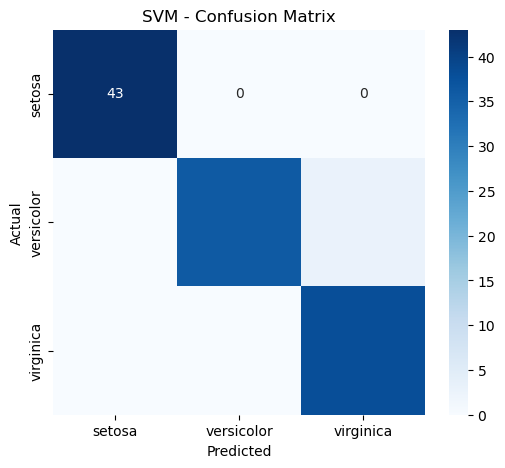

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征
y = iris.target  # 标签

# 2. 划分数据集：训练集占20%，测试集占80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# 3. 创建并训练SVM模型，使用线性核
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 4. 预测测试集
y_pred = svm_model.predict(X_test)

# 5. 使用不同评估指标进行评估
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' 是多分类问题中使用的方式
f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' 是多分类问题中的平均值计算方式
conf_matrix = confusion_matrix(y_test, y_pred)

# 6. 输出评估结果
print(f"\n--- SVM 分类结果 ---\n")
print(f"准确率 (Accuracy): {accuracy * 100:.2f}%")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")
print("\n混淆矩阵 (Confusion Matrix):\n")
print(conf_matrix)

# 7. 使用热力图显示混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


题目二、以新闻数据分类为例 学习朴素贝叶斯
导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
查看类别标签、数据集的描述、数据样本
将文本数据转换为词袋模型
将数据集分为训练集和测试集，训练集比例0.2，随机种子42
创建并训练朴素贝叶斯分类器
使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix
朴素贝叶斯基本概念
朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的统计学分类方法。它被广泛应用于机器学习和数据挖掘领域，特别是在文本分类和垃圾邮件过滤等任务中取得了很好的效果。
聚类分析
聚类是一种无监督学习的方法，旨在将数据集中的样本分组（或簇）成相似的集合，使得同一组内的样本相互之间更相似，而不同组之间的样本更不相似。

聚类是发现数据内在结构的一种方法，它能够帮助我们理解数据的组织、发现隐藏的模式以及从数据中提取有用的信息。

准确率 (Accuracy): 0.8512
召回率 (Recall): 0.8512
F1 分数 (F1 Score): 0.8405


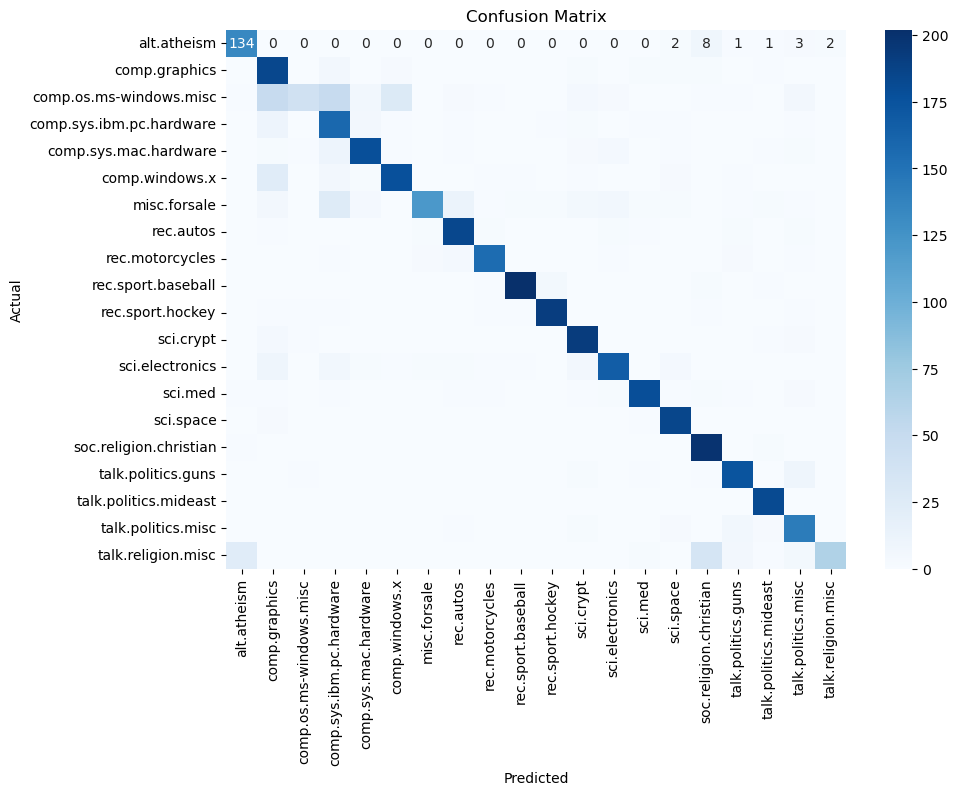

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
newsgroups = fetch_20newsgroups(subset='all')

# 将数据分为训练集和测试集，训练集占 80%
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# 将文本数据转换为词袋模型
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 创建并训练朴素贝叶斯分类器
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# 进行预测
y_pred = nb_classifier.predict(X_test_tfidf)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 输出评估结果
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")

# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


题目三、以鸢尾花数据集为例 学习k-means聚类
导入数据集和聚类库
使用k-means聚类，将数据分为3个簇，设置随机种子为0
PCA 降维到2维空间后，输出可视化结果
尝试先降维，再聚类，再输出可视化结果，比较两次的不同
使用轮廓系数比较聚类效果
绘制轮廓系数与聚类数的关系图
轮廓系数（Silhouette Coefficient） 是一种用于度量数据点与其自身簇内数据的相似度与与最近的相邻簇的数据点的不相似度的指标。

对于每个样本，计算它与同簇内所有其他点的平均距离（称为簇内平均距离，a）。

对于每个样本，计算它与最近的不同簇内所有点的平均距离（称为簇间平均距离，b）。

计算轮廓系数（S）：

​image

轮廓系数的取值范围在[-1, 1]之间：

如果 S 接近1，表示样本与自身簇内的其他样本相似度高，与其他簇内的样本不相似，聚类效果好。
如果 S 接近-1，表示样本与自身簇内的其他样本相似度低，与其他簇内的样本相似度高，聚类效果差。

In [8]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

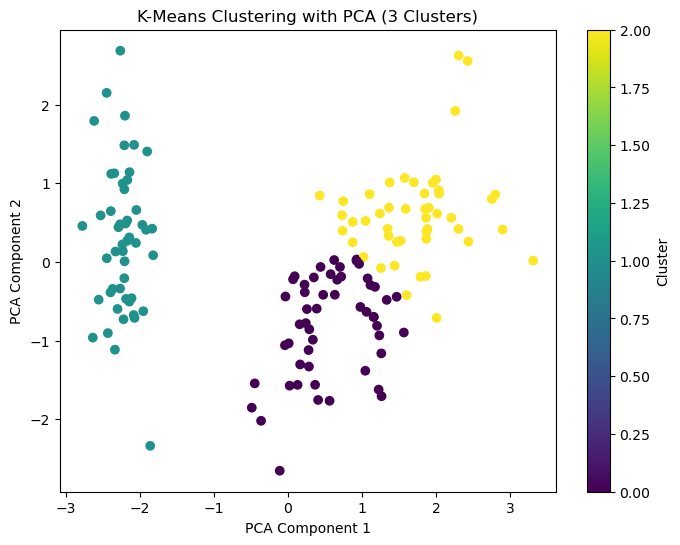

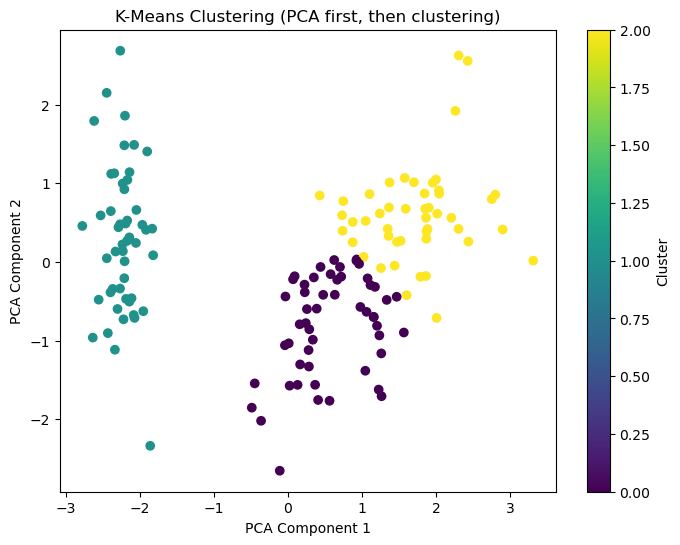

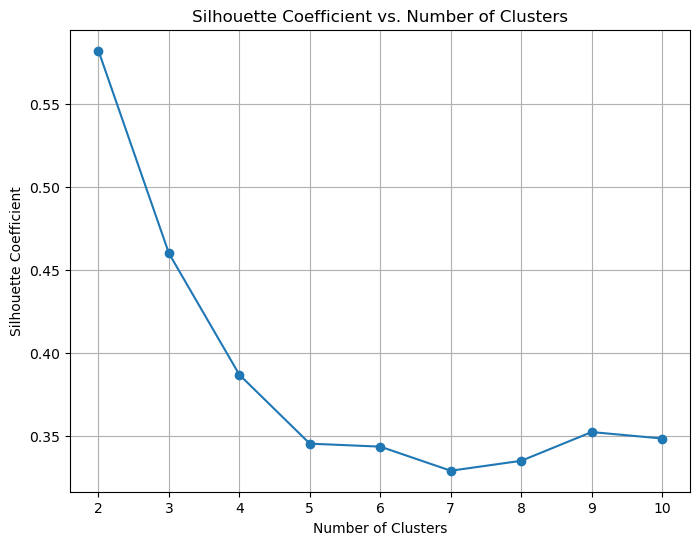

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 导入鸢尾花数据集
data = load_iris()
X = data.data
y = data.target
# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 聚类，设置簇数为 3，随机种子为 0
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# 聚类结果
labels = kmeans.labels_

# PCA 降维到 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering with PCA (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
# 首先进行 PCA 降维
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# KMeans 聚类，设置簇数为 3
kmeans_pca = KMeans(n_clusters=3, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca)

# 可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', marker='o')
plt.title('K-Means Clustering (PCA first, then clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
# 计算不同簇数下的轮廓系数
silhouette_scores = []
cluster_range = range(2, 11)  # 测试簇数从2到10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# 绘制轮廓系数与簇数的关系图
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()
